In [40]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [41]:
df=pd.read_csv("Salary_project.csv")
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [42]:
df.shape

(397, 6)

In [43]:
df.dtypes

rank             object
discipline       object
yrs.since.phd     int64
yrs.service       int64
sex              object
salary            int64
dtype: object

In [44]:
df.info

<bound method DataFrame.info of          rank discipline  yrs.since.phd  yrs.service   sex  salary
0        Prof          B             19           18  Male  139750
1        Prof          B             20           16  Male  173200
2    AsstProf          B              4            3  Male   79750
3        Prof          B             45           39  Male  115000
4        Prof          B             40           41  Male  141500
..        ...        ...            ...          ...   ...     ...
392      Prof          A             33           30  Male  103106
393      Prof          A             31           19  Male  150564
394      Prof          A             42           25  Male  101738
395      Prof          A             25           15  Male   95329
396  AsstProf          A              8            4  Male   81035

[397 rows x 6 columns]>

In [45]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

le=LabelEncoder()
df['rank']=le.fit_transform(df['rank'])
df['discipline']=le.fit_transform(df['discipline'])
df['sex']=le.fit_transform(df['sex'])

In [46]:
df

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [47]:
df.columns

Index(['rank', 'discipline', 'yrs.since.phd', 'yrs.service', 'sex', 'salary'], dtype='object')

In [48]:
df.describe()

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,1.508816,0.544081,22.314861,17.614610,0.901763,113706.458438
std,0.757486,0.498682,12.887003,13.006024,0.298010,30289.038695
min,0.000000,0.000000,1.000000,0.000000,0.000000,57800.000000
25%,1.000000,0.000000,12.000000,7.000000,1.000000,91000.000000
50%,2.000000,1.000000,21.000000,16.000000,1.000000,107300.000000
75%,2.000000,1.000000,32.000000,27.000000,1.000000,134185.000000
max,2.000000,1.000000,56.000000,60.000000,1.000000,231545.000000


Stastic Summary
* We can observe that mean and 50% of all the columns are almost equal and the data has no skewness
* There is much difference between mean and std in rank, yrs.since.phd, salary and the data is too spreaded
* In the columns yrs.service and salary there is a high gap between 75% and max so there are outliers present in those columns

In [49]:
df.salary.unique().shape

(371,)

Out of 397 records od salary 371 are unique data

In [50]:
df.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

<AxesSubplot:>

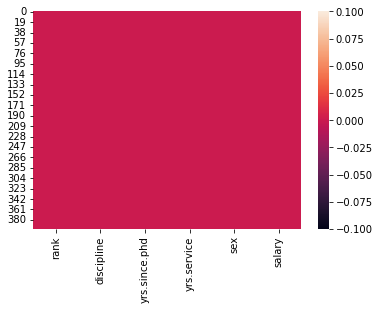

In [51]:
sns.heatmap(df.isnull())

There are no missing values in the data

In [52]:
dfcorr=df.corr()
dfcorr

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
rank,1.000000,-0.086266,0.525500,0.447499,0.132492,0.522207
discipline,-0.086266,1.000000,-0.218087,-0.164599,0.003724,0.156084
yrs.since.phd,0.525500,-0.218087,1.000000,0.909649,0.148788,0.419231
yrs.service,0.447499,-0.164599,0.909649,1.000000,0.153740,0.334745
sex,0.132492,0.003724,0.148788,0.153740,1.000000,0.138610
salary,0.522207,0.156084,0.419231,0.334745,0.138610,1.000000


<AxesSubplot:>

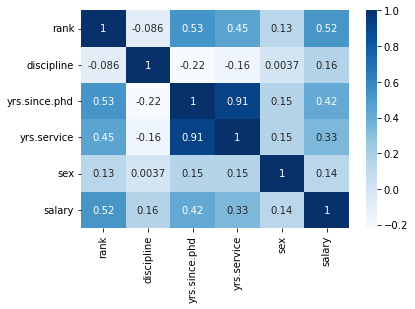

In [53]:
plt.figure(figsize=(6,4))
sns.heatmap(dfcorr,cmap='Blues',annot=True)

We can observe that Salary is highly co related with sex and discipline and none are negatively correlated.

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(df))

In [55]:
threshold=3
print(np.where(z>3))

(array([  9,  19,  24,  34,  35,  43,  47,  48,  52,  63,  68,  84,  90,
       103, 114, 119, 123, 127, 131, 132, 133, 148, 153, 179, 186, 218,
       230, 231, 233, 237, 245, 253, 254, 274, 316, 323, 330, 332, 334,
       341, 358, 361, 364], dtype=int64), array([4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5],
      dtype=int64))


In [56]:
df_new=df[(z<3).all(axis=1)]
df_new

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,2,1,19,18,1,139750
1,2,1,20,16,1,173200
2,1,1,4,3,1,79750
3,2,1,45,39,1,115000
4,2,1,40,41,1,141500
...,...,...,...,...,...,...
392,2,0,33,30,1,103106
393,2,0,31,19,1,150564
394,2,0,42,25,1,101738
395,2,0,25,15,1,95329


In [57]:
x=df_new.iloc[:,0:-1]
y=df_new.iloc[:,-1]


In [58]:
x

,rank,discipline,yrs.since.phd,yrs.service,sex
0,2,1,19,18,1
1,2,1,20,16,1
2,1,1,4,3,1
3,2,1,45,39,1
4,2,1,40,41,1
...,...,...,...,...,...
392,2,0,33,30,1
393,2,0,31,19,1
394,2,0,42,25,1
395,2,0,25,15,1


In [59]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 354, dtype: int64

In [60]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [61]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF Factors"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [62]:
calc_vif(x)

,Variables,VIF Factors
0,rank,1.390589
1,discipline,1.063747
2,yrs.since.phd,6.505842
3,yrs.service,5.765343
4,sex,8.429221


As the column sex has high multicollinearity with yrs.since.phd column and it is has less correlation with output compared to yrs.since.phd we can drop the column sex

In [63]:
x=x.drop(['sex'],axis=1)
x

,rank,discipline,yrs.since.phd,yrs.service
0,2,1,19,18
1,2,1,20,16
2,1,1,4,3
3,2,1,45,39
4,2,1,40,41
...,...,...,...,...
392,2,0,33,30
393,2,0,31,19
394,2,0,42,25
395,2,0,25,15


In [64]:
x=x.astype(int)
x.dtypes

rank             int32
discipline       int32
yrs.since.phd    int32
yrs.service      int32
dtype: object

In [65]:
x.isnull().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
dtype: int64

In [66]:
calc_vif(x)

,Variables,VIF Factors
0,rank,5.983209
1,discipline,1.682002
2,yrs.since.phd,23.932821
3,yrs.service,16.549610


In [67]:
x

,rank,discipline,yrs.since.phd,yrs.service
0,2,1,19,18
1,2,1,20,16
2,1,1,4,3
3,2,1,45,39
4,2,1,40,41
...,...,...,...,...
392,2,0,33,30
393,2,0,31,19
394,2,0,42,25
395,2,0,25,15


In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=45)

In [69]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [70]:
lm.score(x_train,y_train)

0.36356518199629584

In [72]:
pred=lm.predict(x_test)
print('predicted salary :',pred)
print('actual salary :',y_test)

predicted salary : [118575.57680844 116390.12643929 121147.74522492  89032.6313882
 116386.23730214 125560.46188798 125074.55544251 114206.62063872
 100332.98930124 122891.04964194 130306.41326216 105576.51453234
 112467.20535885 104265.63322456 117258.86179494 116392.07100787
 122079.68675966 105287.87987519 122018.42514914  88680.79055196
  88158.06232683 122454.73739554 132951.5107006  112569.17788618
  99894.73248627 120709.48840994 106012.82677874 120316.93665689
  81318.91026797 108096.30462055 124636.29862754  92527.01849655
 125082.33371681 132074.99707065  82558.80712234 138609.95792377
 111160.21318822 122018.42514914 140362.98518367 106351.05563495
 135565.49504185 119440.42302694 127686.59521518 121149.68979349
 140807.07570437 117697.11860992 121643.37451326 130318.08067361
 136061.1243302  133439.36171465 110723.90094182 112028.94854387
 117266.64006924 145608.45498334 127759.52423716  91740.80998248
  91652.44943517 121586.00203989 128570.88711943 135127.23822688
  90777

In [73]:
print('errors :')
print('Mean absolute error :',mean_absolute_error(y_test,pred))
print('Mean squared error :',mean_squared_error(y_test,pred))
print('Root mean squared error :',np.sqrt(mean_squared_error(y_test,pred)))

errors :
Mean absolute error : 19450.877673358595
Mean squared error : 559197011.8151214
Root mean squared error : 23647.34682401223


Since the score of lm is too low and errors are high we can try with other model for their performance

In [74]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtrpred=dtr.predict(x_test)
print(dtrpred)
print(dtr.score(x_train,y_train))

[134690.         134690.         146000.          72750.
 119450.         101036.         117889.         138771.
  89942.         121466.5        119700.          85608.
 105668.          84240.         135200.         122500.
 170500.         105000.         130664.         119800.
  72750.         163200.         165000.          83600.
  92233.33333333 167284.          73266.         101036.
 104800.         136000.         142500.          69700.
 135027.         111168.         119800.         147310.5
 104350.         130664.         142023.         121946.
 181257.         143940.         104057.5        119500.
 189409.         119450.         170500.         126933.
 131205.         124750.         114330.         101100.
 122500.         133700.         132000.         126431.
  74000.         145000.         142500.         165233.33333333
  74000.         119450.          93110.          88400.
  93110.         106294.          88000.         121466.5
 105350.          920

In [75]:
#Predicting salary by providing values

s=np.array([1,0,14,12])

In [76]:
s.shape

(4,)

In [77]:
s=s.reshape(1,-1)
s.shape

(1, 4)

In [78]:
dtr.predict(s)

array([78785.])